# EDA

### Building a predictive model to predict which subreddit a post came from

Subreddits: 'scifi' , 'Fantasy'

In [1]:
#Imports
import spacy
import pandas as pd
import numpy as np

In [2]:
nlp = spacy.load('en_core_web_lg')

# MVP Model Features
<ul>
    <li>#1 What subreddit did the post come from?</li>
    <li>#2 What is the selftext</li>
    <li>#3 What is the title of the post</li>
</ul>

## Fantasy EDA

In [3]:
fantasy_df = pd.read_csv('./data/dirty_fantasy.csv')
mvp_fantasy_df = fantasy_df[['subreddit','title','selftext']] #Constructing MVP Dataframe for Fantasy subreddit

In [4]:
mvp_fantasy_df.head() # selftext contains nulls. #?

,subreddit,title,selftext
0,Fantasy,Looking for contained grimdark stories,"I love grimdark stories, but am also starting ..."
1,Fantasy,Pariahs my new novel!,NaN
2,Fantasy,The Mask Falling SPOILERS,Ok can we discuss the fourth book in Samantha ...
3,Fantasy,GREAT MAGIC SYSTEM WITH A TWIST,[removed]
4,Fantasy,AMAZING MAGIC SYSTEM WITH A TWIST,NaN


In [5]:
mvp_fantasy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3000 non-null   object
 1   title      3000 non-null   object
 2   selftext   2475 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


In [6]:
#Creating feature to track whether or not the existence of selftext is impactful enough to help the model determine origin
mvp_fantasy_df['has_selftext'] = mvp_fantasy_df['selftext'].notnull()
mvp_fantasy_df['has_selftext'] = mvp_fantasy_df['has_selftext'].map({True:1,False:0})

<ipython-input-6-afc0e34b544b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp_fantasy_df['has_selftext'] = mvp_fantasy_df['selftext'].notnull()
<ipython-input-6-afc0e34b544b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp_fantasy_df['has_selftext'] = mvp_fantasy_df['has_selftext'].map({True:1,False:0})


In [7]:
mvp_fantasy_df['has_selftext'].mean() #82.5% of fantasy posts have selftext

0.825

## Sci-fi EDA

In [8]:
scifi_df = pd.read_csv('./data/dirty_scifi.csv')
mvp_scifi_df = scifi_df[['subreddit','title','selftext']] #Constructing MVP Dataframe for scifi subreddit

In [9]:
mvp_scifi_df.head() 

,subreddit,title,selftext
0,scifi,Any novels or short stories about a civilizati...,[removed]
1,scifi,‘Alien’ Series In The Works At FX With Noah Ha...,NaN
2,scifi,With release of cyberpunk 2077 i am here to re...,NaN
3,scifi,"City invasion (Milan, ITALY). Just for fun! [OC]",NaN
4,scifi,Round Earth Theory - Monoliths,NaN


In [10]:
mvp_scifi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3000 non-null   object
 1   title      3000 non-null   object
 2   selftext   1628 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


In [11]:
mvp_scifi_df['has_selftext'] = mvp_scifi_df['selftext'].notnull()
mvp_scifi_df['has_selftext'] = mvp_scifi_df['has_selftext'].map({True:1,False:0})

<ipython-input-11-2cbd6f7ada80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp_scifi_df['has_selftext'] = mvp_scifi_df['selftext'].notnull()
<ipython-input-11-2cbd6f7ada80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp_scifi_df['has_selftext'] = mvp_scifi_df['has_selftext'].map({True:1,False:0})


In [12]:
mvp_scifi_df['has_selftext'].unique()

array([1, 0], dtype=int64)

In [13]:
mvp_scifi_df.head()

,subreddit,title,selftext,has_selftext
0,scifi,Any novels or short stories about a civilizati...,[removed],1
1,scifi,‘Alien’ Series In The Works At FX With Noah Ha...,NaN,0
2,scifi,With release of cyberpunk 2077 i am here to re...,NaN,0
3,scifi,"City invasion (Milan, ITALY). Just for fun! [OC]",NaN,0
4,scifi,Round Earth Theory - Monoliths,NaN,0


In [14]:
mvp_scifi_df['has_selftext'].mean() # 54.3% of scifi posts have selftext

0.5426666666666666

## Merging Dataframes

In [15]:
mvp_df = mvp_fantasy_df.merge(mvp_scifi_df,how='outer')
mvp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     6000 non-null   object
 1   title         6000 non-null   object
 2   selftext      4103 non-null   object
 3   has_selftext  6000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 234.4+ KB


## Data EDA

In [16]:
mvp_df['title'].duplicated().sum() #Checking for duplicate posts

246

Because 246 duplicate posts isn't an alarming number, I am going to keep them in the dataset. I should mark them in a future pass to see if duplicates can be used to judge origin of post.

In [17]:
mvp_df.head()

,subreddit,title,selftext,has_selftext
0,Fantasy,Looking for contained grimdark stories,"I love grimdark stories, but am also starting ...",1
1,Fantasy,Pariahs my new novel!,NaN,0
2,Fantasy,The Mask Falling SPOILERS,Ok can we discuss the fourth book in Samantha ...,1
3,Fantasy,GREAT MAGIC SYSTEM WITH A TWIST,[removed],1
4,Fantasy,AMAZING MAGIC SYSTEM WITH A TWIST,NaN,0


## Modeling

In [26]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
#Train Test Split
X = mvp_df['title']
y = mvp_df['subreddit']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

In [28]:
#Pipeline
mvp_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', BernoulliNB())
])

In [29]:
cross_val_score(mvp_pipe,X_train,y_train).mean()

0.8391111111111111

In [30]:
mvp_pipe.fit(X_train,y_train)
print(f'The Train Score: {mvp_pipe.score(X_train,y_train)}')
print(f'The Test Core: {mvp_pipe.score(X_test,y_test)}')

The Train Score: 0.9273333333333333
The Test Core: 0.8273333333333334


We can see from the comparison of the two scores that our model is overfit. We can add more features to increase bias, but overall we can be satisfied with this MVP.

In [31]:
y_test

5046      scifi
1167    Fantasy
3359      scifi
2239    Fantasy
5559      scifi
         ...   
1180    Fantasy
2693    Fantasy
79      Fantasy
1661    Fantasy
5660      scifi
Name: subreddit, Length: 1500, dtype: object

In [32]:
#Get Predictions
mvp_preds = mvp_pipe.predict(X_test)

<ipython-input-40-b2a44bf34473>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-40-b2a44bf34473>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


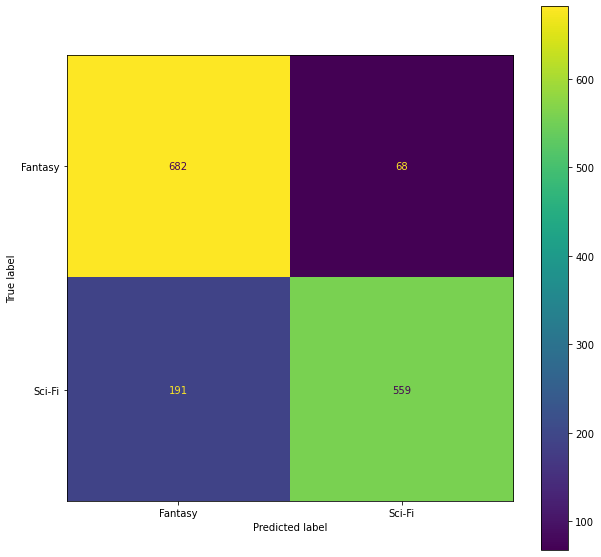

In [40]:
#Confusion Matrix
cm = confusion_matrix(y_test,mvp_preds)
tn,fp,fn,tp = cm.ravel()

labels = ['Fantasy','Sci-Fi']

cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
cmp.plot(ax=ax);
plt.show();

 Our next step is to hypertune our parameters to product a better model.

In [34]:
pipe_params = {
    'cvec__max_features':[3_000,4_000,5_000], #Capping features at 3,000/4,000/5,000 words
    'cvec__min_df':[2,3,4,5,6], #Minimum documents required to contain a word
    'cvec__ngram_range':[(1,1),(1,2),(1,3),(1,4)] #Checking individual words as well as word pairs
}

In [35]:
mvp_gs = GridSearchCV(mvp_pipe, param_grid=pipe_params,cv=5)

In [36]:
mvp_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', BernoulliNB())]),
             param_grid={'cvec__max_features': [3000, 4000, 5000],
                         'cvec__min_df': [2, 3, 4, 5, 6],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)]})

In [37]:
print(f'The Train Score: {mvp_gs.score(X_train,y_train)}')
print(f'The Test Score: {mvp_gs.score(X_test,y_test)}')
print(f'Best Parameters: {mvp_gs.best_params_}')

The Train Score: 0.898
The Test Score: 0.8333333333333334
Best Parameters: {'cvec__max_features': 4000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1)}


Let's see where we improved in the confusion matrix

<ipython-input-39-2cacc95f30a7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-39-2cacc95f30a7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


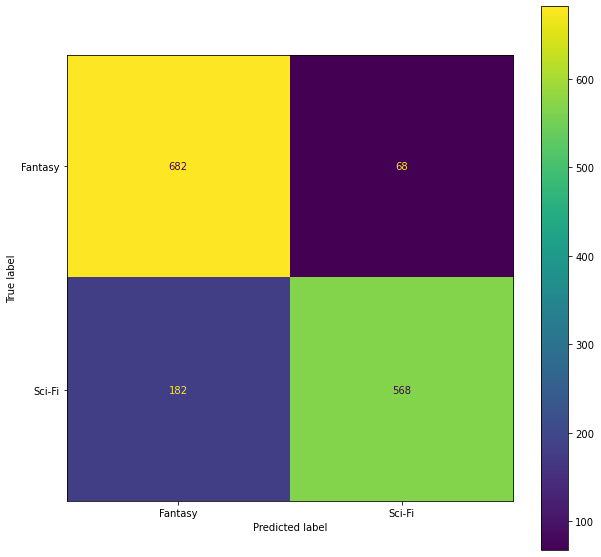

In [39]:
#Confusion Matrix
cm = confusion_matrix(y_test,mvp_gs.predict(X_test))
tn,fp,fn,tp = cm.ravel()

labels = ['Fantasy','Sci-Fi']

cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
cmp.plot(ax=ax);
plt.show();

Our gridsearch improved our model's ability to accurately classify Sci-Fi posts!